In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,precision_recall_curve, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [3]:
pd.options.display.max_columns

20

In [4]:
df= pd.read_csv('../data/processed/df_genus_encoded.csv')
df.shape

(12000, 28)

In [5]:
df.head()

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Cranial_Capacity,Height,Incisor_Size_encoded,Jaw_Shape_encoded,...,Biped_encoded,foots_encoded,arms_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,hominino Orrorin tugenencin,Homininos,6.041124,0,1,1,144.51410,110.24323,2,4,...,0,0,0,4,0,1,0,0,0,1
1,hominino Ardipithecus ramidus / kabadda,Homininos,4.383910,0,1,2,293.96021,107.69018,2,4,...,1,0,0,2,1,1,0,0,0,2
2,Australopithecus Afarensis,Australopithecus,3.749413,0,1,2,264.79849,123.76644,4,3,...,2,1,0,4,0,0,0,0,0,5
3,Australopithecus Anamensis,Australopithecus,4.595606,0,1,1,403.28047,111.40831,4,3,...,2,0,0,4,0,1,0,1,0,4
4,Australopithecus Africanus,Australopithecus,3.614060,0,2,1,679.15233,111.59004,2,4,...,2,0,0,4,0,1,1,0,0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genus_&_Specie              12000 non-null  object 
 1   genero_etiqueta             12000 non-null  object 
 2   Time                        12000 non-null  float64
 3   Location_encoded            12000 non-null  int64  
 4   Zone_encoded                12000 non-null  int64  
 5   Habitat_encoded             12000 non-null  int64  
 6   Cranial_Capacity            12000 non-null  float64
 7   Height                      12000 non-null  float64
 8   Incisor_Size_encoded        12000 non-null  int64  
 9   Jaw_Shape_encoded           12000 non-null  int64  
 10  Torus_Supraorbital_encoded  12000 non-null  int64  
 11  Prognathism_encoded         12000 non-null  int64  
 12  Foramen_encoded             12000 non-null  int64  
 13  Canine_Size_encoded         120

### Me cargo la matiz de confusión para ver qué Features coger

<Axes: >

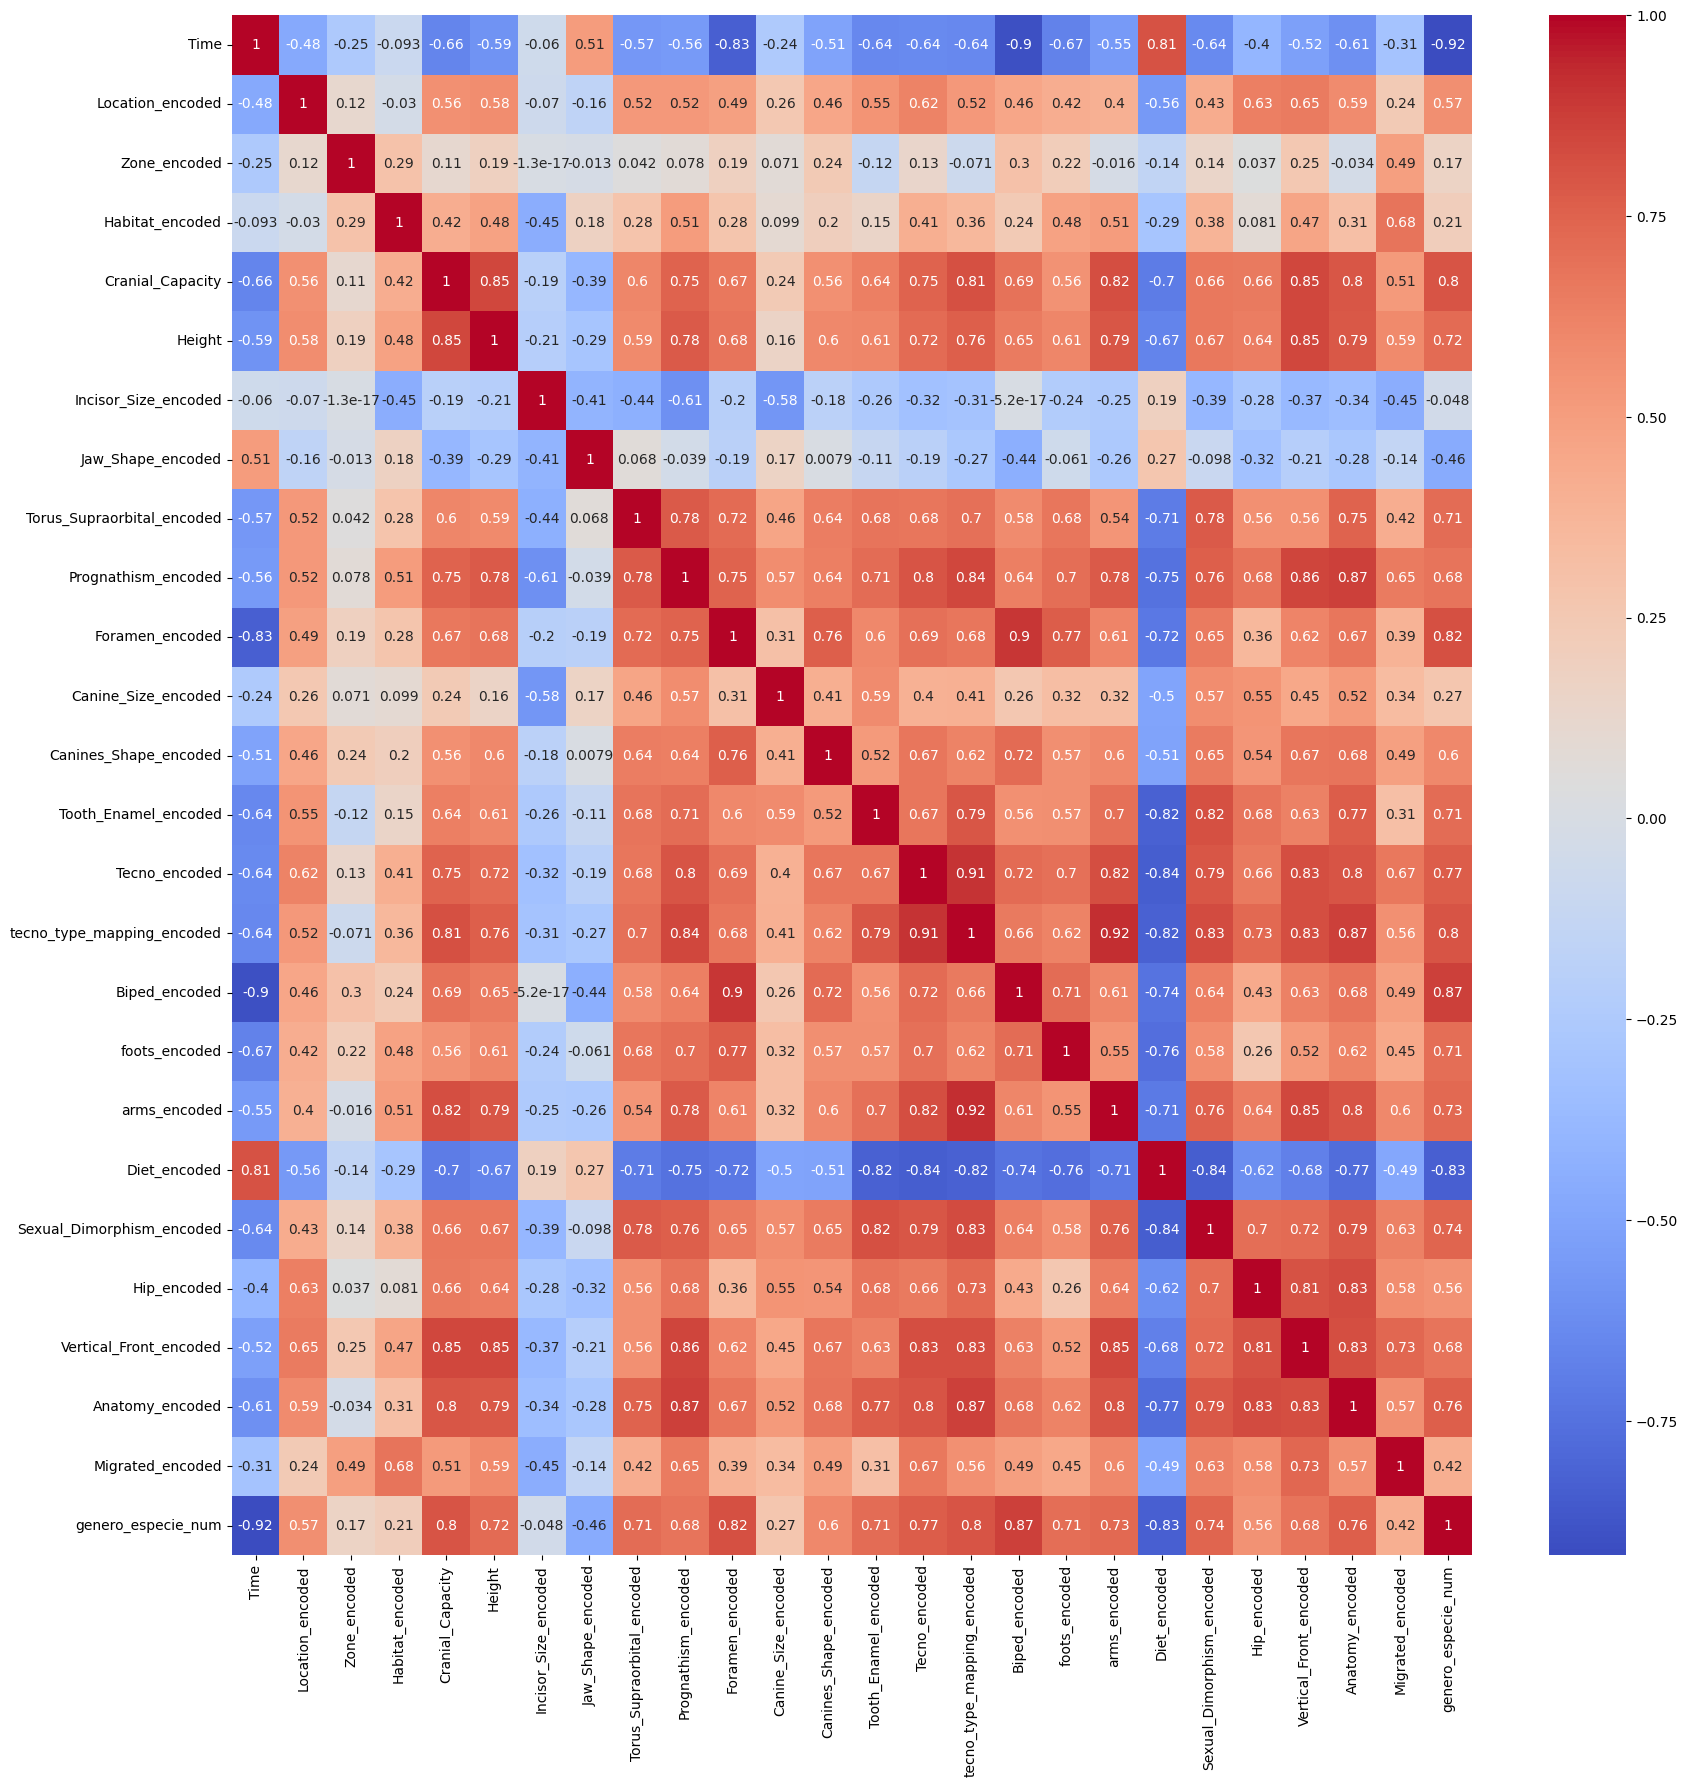

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

### Divido el dataset procesado en train y test para que no haya ningun tipo de contaminación de los datos de test y poder evaluar los modelos correctamente.

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.shape)
print(test_df.shape)

train_df.to_csv('../data/train/train2.csv', index=False)
test_df.to_csv('../data/test/test2.csv', index=False)

(9600, 28)
(2400, 28)


### Me los guardo train y test en sus correspondientes carpetas

In [8]:
df_train= pd.read_csv('../data/train/train2.csv')
df_test= pd.read_csv('../data/test/test2.csv')

In [10]:
df_train.head()

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Cranial_Capacity,Height,Incisor_Size_encoded,Jaw_Shape_encoded,...,Biped_encoded,foots_encoded,arms_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,Homo Erectus,Homo temprano,1.576796,1,3,3,1024.94102,158.95309,1,2,...,3,1,1,1,1,2,2,2,1,17
1,Australopithecus Afarensis,Australopithecus,3.838121,0,1,2,477.83768,134.88884,4,3,...,2,1,0,4,0,0,0,0,0,5
2,Homo Erectus,Homo temprano,1.719525,1,3,3,1011.64225,150.41809,1,2,...,3,1,1,1,1,2,2,2,1,17
3,Homo Floresiensis,Otros,0.910479,1,1,0,219.17185,99.97738,2,3,...,3,1,0,1,1,1,0,1,0,19
4,Homo Antecesor,Homo temprano,0.791006,2,3,3,939.82732,171.96014,3,3,...,3,1,1,1,1,2,2,1,1,20


In [11]:
df_train.columns

Index(['Genus_&_Specie', 'genero_etiqueta', 'Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded', 'Cranial_Capacity', 'Height',
       'Incisor_Size_encoded', 'Jaw_Shape_encoded',
       'Torus_Supraorbital_encoded', 'Prognathism_encoded', 'Foramen_encoded',
       'Canine_Size_encoded', 'Canines_Shape_encoded', 'Tooth_Enamel_encoded',
       'Tecno_encoded', 'tecno_type_mapping_encoded', 'Biped_encoded',
       'foots_encoded', 'arms_encoded', 'Diet_encoded',
       'Sexual_Dimorphism_encoded', 'Hip_encoded', 'Vertical_Front_encoded',
       'Anatomy_encoded', 'Migrated_encoded', 'genero_especie_num'],
      dtype='object')

### Defino (X e y) para Train y (X1 e y1) para Test

In [12]:
X=df_train[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded','arms_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded']]
y= df_train['genero_especie_num']
print(X.shape)
print(y.shape)

(9600, 25)
(9600,)


In [23]:
X1=df_test[['Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded','Cranial_Capacity','Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded','arms_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded']]
y1= df_test['genero_especie_num']
print(X1.shape)

(2400, 25)


#### Lista de nombres para las etiquetas de la matriz de confusion

In [14]:
nombres_hominidos = {
    'hominino Orrorin tugenencin': 0,
    'hominino Sahelanthropus tchadensis': 1,
    'hominino Ardipithecus ramidus / kabadda': 2,
    'Ardipithecus Ramidus / Kadabba': 3,
    'Australopithecus Anamensis': 4,
    'Australopithecus Afarensis': 5,
    'Australopithecus Bahrelghazali': 6,
    'Australopithecus Africanus': 7,
    'Australopithecus Garhi': 8,
    'Australopithecus Sediba': 9,
    'Paranthropus Aethiopicus': 10,
    'Paranthropus Robustus': 11,
    'Paranthropus Boisei': 12,
    'Homo Habilis': 13,
    'Homo Rudolfensis': 14,
    'Homo Georgicus': 15,
    'Homo Ergaster': 16,
    'Homo Erectus': 17,
    'Homo Naledi': 18,
    'Homo Floresiensis': 19,
    'Homo Antecesor': 20,
    'Homo Heidelbergensis': 21,
    'Homo Rodhesiensis': 22,
    'Homo Neanderthalensis\n': 23,
    'Homo Sapiens': 24   
}

lista_nombres_hominidos = list(nombres_hominidos.keys())
lista_nombres_hominidos

['hominino Orrorin tugenencin',
 'hominino Sahelanthropus tchadensis',
 'hominino Ardipithecus ramidus / kabadda',
 'Ardipithecus Ramidus / Kadabba',
 'Australopithecus Anamensis',
 'Australopithecus Afarensis',
 'Australopithecus Bahrelghazali',
 'Australopithecus Africanus',
 'Australopithecus Garhi',
 'Australopithecus Sediba',
 'Paranthropus Aethiopicus',
 'Paranthropus Robustus',
 'Paranthropus Boisei',
 'Homo Habilis',
 'Homo Rudolfensis',
 'Homo Georgicus',
 'Homo Ergaster',
 'Homo Erectus',
 'Homo Naledi',
 'Homo Floresiensis',
 'Homo Antecesor',
 'Homo Heidelbergensis',
 'Homo Rodhesiensis',
 'Homo Neanderthalensis\n',
 'Homo Sapiens']

## PRIMER MODELO DE RANDOM FOREST CON PCA Y SCALER

In [82]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'pca__n_components': [24,25],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [2,3,4],
    'classifier__max_leaf_nodes': [9,10,11,16]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'pca__n_components': 25, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 10, 'classifier__max_depth': 3}


In [83]:
be=rs.best_estimator_.fit(X,y)

In [84]:
y_pred_rf_pca_test1=be.predict(X1)
y_pred_rf_pca_test1_pproba = be.predict_proba(X1)

In [85]:
y_pred_rf_pca_test1

array([6, 4, 7, ..., 2, 4, 1], dtype=int64)

In [86]:
precision1 = precision_score(y1, y_pred_rf_pca_test1,average='weighted')
recall1 = recall_score(y1, y_pred_rf_pca_test1,average='weighted')
f11 = f1_score(y1, y_pred_rf_pca_test1,average='weighted')
accuracy1=accuracy_score(y1,y_pred_rf_pca_test1)
roc_auc1= roc_auc_score(y1,y_pred_rf_pca_test1_pproba,average='weighted',multi_class='ovo')
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)
print('ROC AUC score:', roc_auc1)

print('Accuracy',accuracy1)

Precision: 0.999588122605364
Recall: 0.9995833333333334
F1-score: 0.9995835213120917
ROC AUC score: 1.0
Accuracy 0.9995833333333334


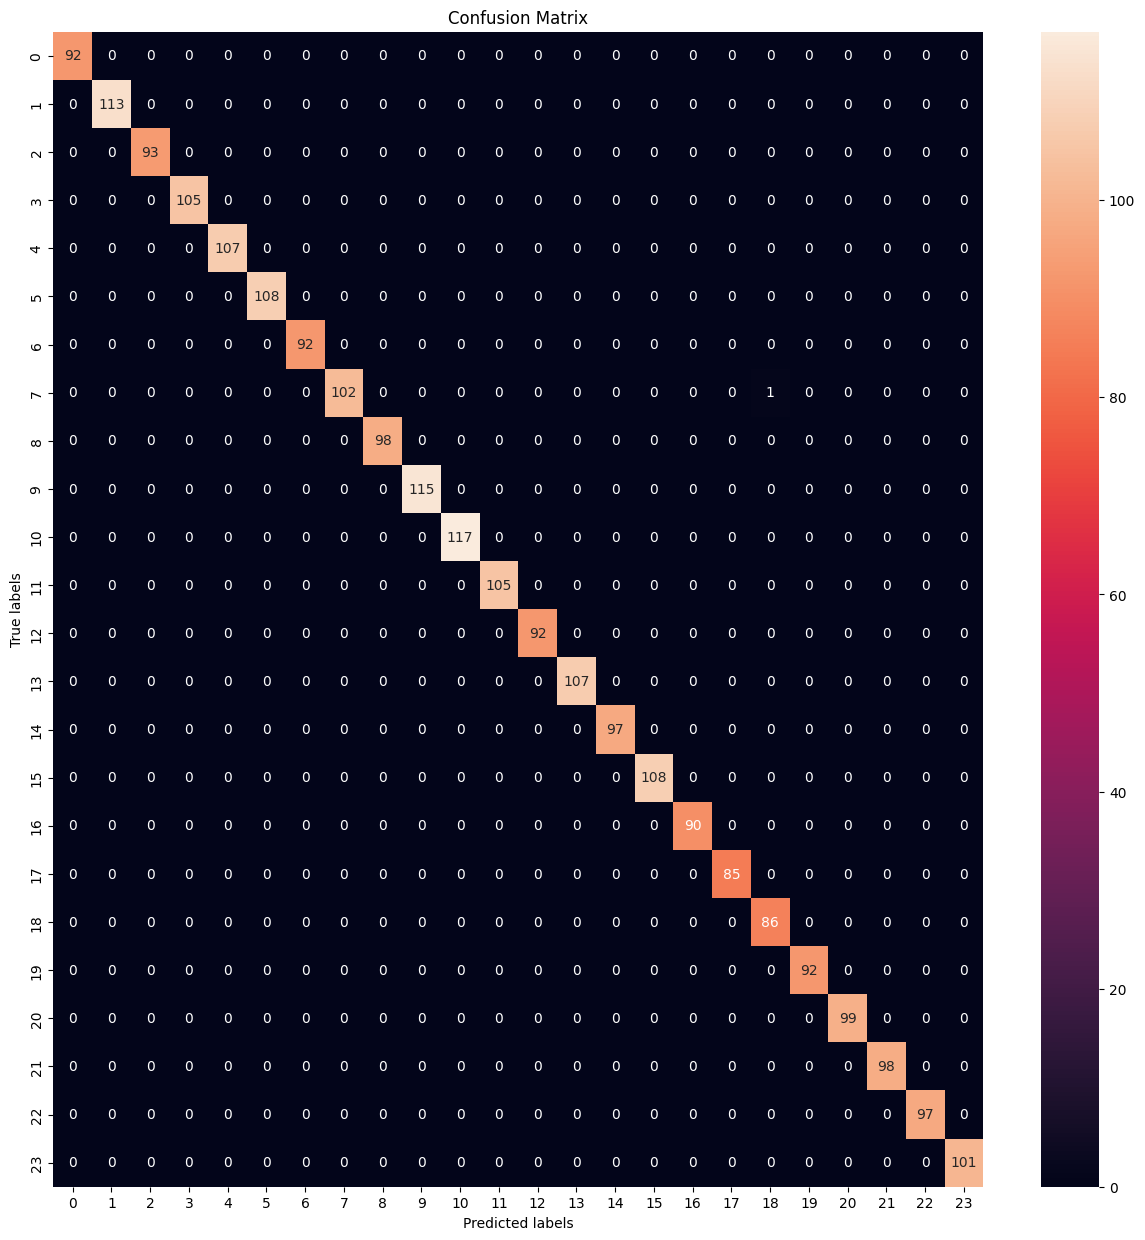

In [87]:

plt.figure(figsize=(15,15))
c_matrix = confusion_matrix(y1,y_pred_rf_pca_test1)
#print(c_matrix)
sns.heatmap(c_matrix, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [88]:
import pickle

filename = '../models/rf1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be, archivo_salida)

In [58]:
with open(filename, 'rb') as archivo_entrada:
    rf1 = pickle.load(archivo_entrada)

## SEGUNDO MODELO DE RANDOM FOREST CON SCALER Y PCA ------- MODELO FINAL

In [15]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [24,25],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3,5],
    'classifier__max_leaf_nodes': [16,17,18]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 25, 'classifier__n_estimators': 100, 'classifier__max_leaf_nodes': 17, 'classifier__max_depth': 5}


In [16]:
be1=rs.best_estimator_.fit(X,y)

In [17]:
importances = be1.named_steps['classifier'].feature_importances_
importances

array([6.17176460e-02, 6.25262482e-02, 1.01630638e-01, 1.04334955e-01,
       7.58716640e-02, 3.38304662e-02, 8.97601068e-02, 5.05009411e-02,
       1.01691725e-01, 7.65737521e-02, 6.75985396e-02, 7.42762214e-02,
       3.20210079e-02, 2.89018488e-02, 1.05712185e-02, 7.29549879e-03,
       7.03788469e-03, 6.63852772e-03, 0.00000000e+00, 1.44862675e-03,
       0.00000000e+00, 0.00000000e+00, 1.04116228e-04, 2.51376609e-03,
       3.15460074e-03])

In [83]:
#Test
y_pred_rf_pca_test1_2=be1.predict(X1)
y_pred_rf_pca_test1_pproba_2 = be1.predict_proba(X1)
#Train
y_pred_rf_pca_train1_2=be1.predict(X)
y_pred_rf_pca_train1_pproba_2 = be1.predict_proba(X)

In [84]:
precision2 = precision_score(y1, y_pred_rf_pca_test1_2,average='weighted')
recall2 = recall_score(y1, y_pred_rf_pca_test1_2,average='weighted')
f12 = f1_score(y1, y_pred_rf_pca_test1_2,average='weighted')
accuracy2=accuracy_score(y1,y_pred_rf_pca_test1_2)
roc_auc_2= roc_auc_score(y,y_pred_rf_pca_train1_pproba_2,average='weighted',multi_class='ovo')

precision_train2 = precision_score(y, y_pred_rf_pca_train1_2,average='weighted')
recall_train2 = recall_score(y, y_pred_rf_pca_train1_2,average='weighted')
f1_train2 = f1_score(y, y_pred_rf_pca_train1_2,average='weighted')
accuracy_train2=accuracy_score(y,y_pred_rf_pca_train1_2)
roc_auc_train2= roc_auc_score(y,y_pred_rf_pca_train1_pproba_2,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)
print('ROC AUC score:', roc_auc_train2)
print('Accuracy',accuracy2)
print('-'*200)
print('TRAIN')
print("Precision:", precision_train2)
print("Recall:", recall_train2)
print("F1-score:", f1_train2)
print('ROC AUC score:', roc_auc_train2)
print('Accuracy',accuracy_train2)


TEST
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0


In [85]:
report = classification_report(y1, y_pred_rf_pca_test1_2)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00       107
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00        92
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00        98
          10       1.00      1.00      1.00       115
          11       1.00      1.00      1.00       117
          12       1.00      1.00      1.00       105
          13       1.00      1.00      1.00        92
          14       1.00      1.00      1.00       107
          15       1.00      1.00      1.00        97
          16       1.00      1.00      1.00       108
          17       1.00      1.00      1.00        90
          18       1.00    

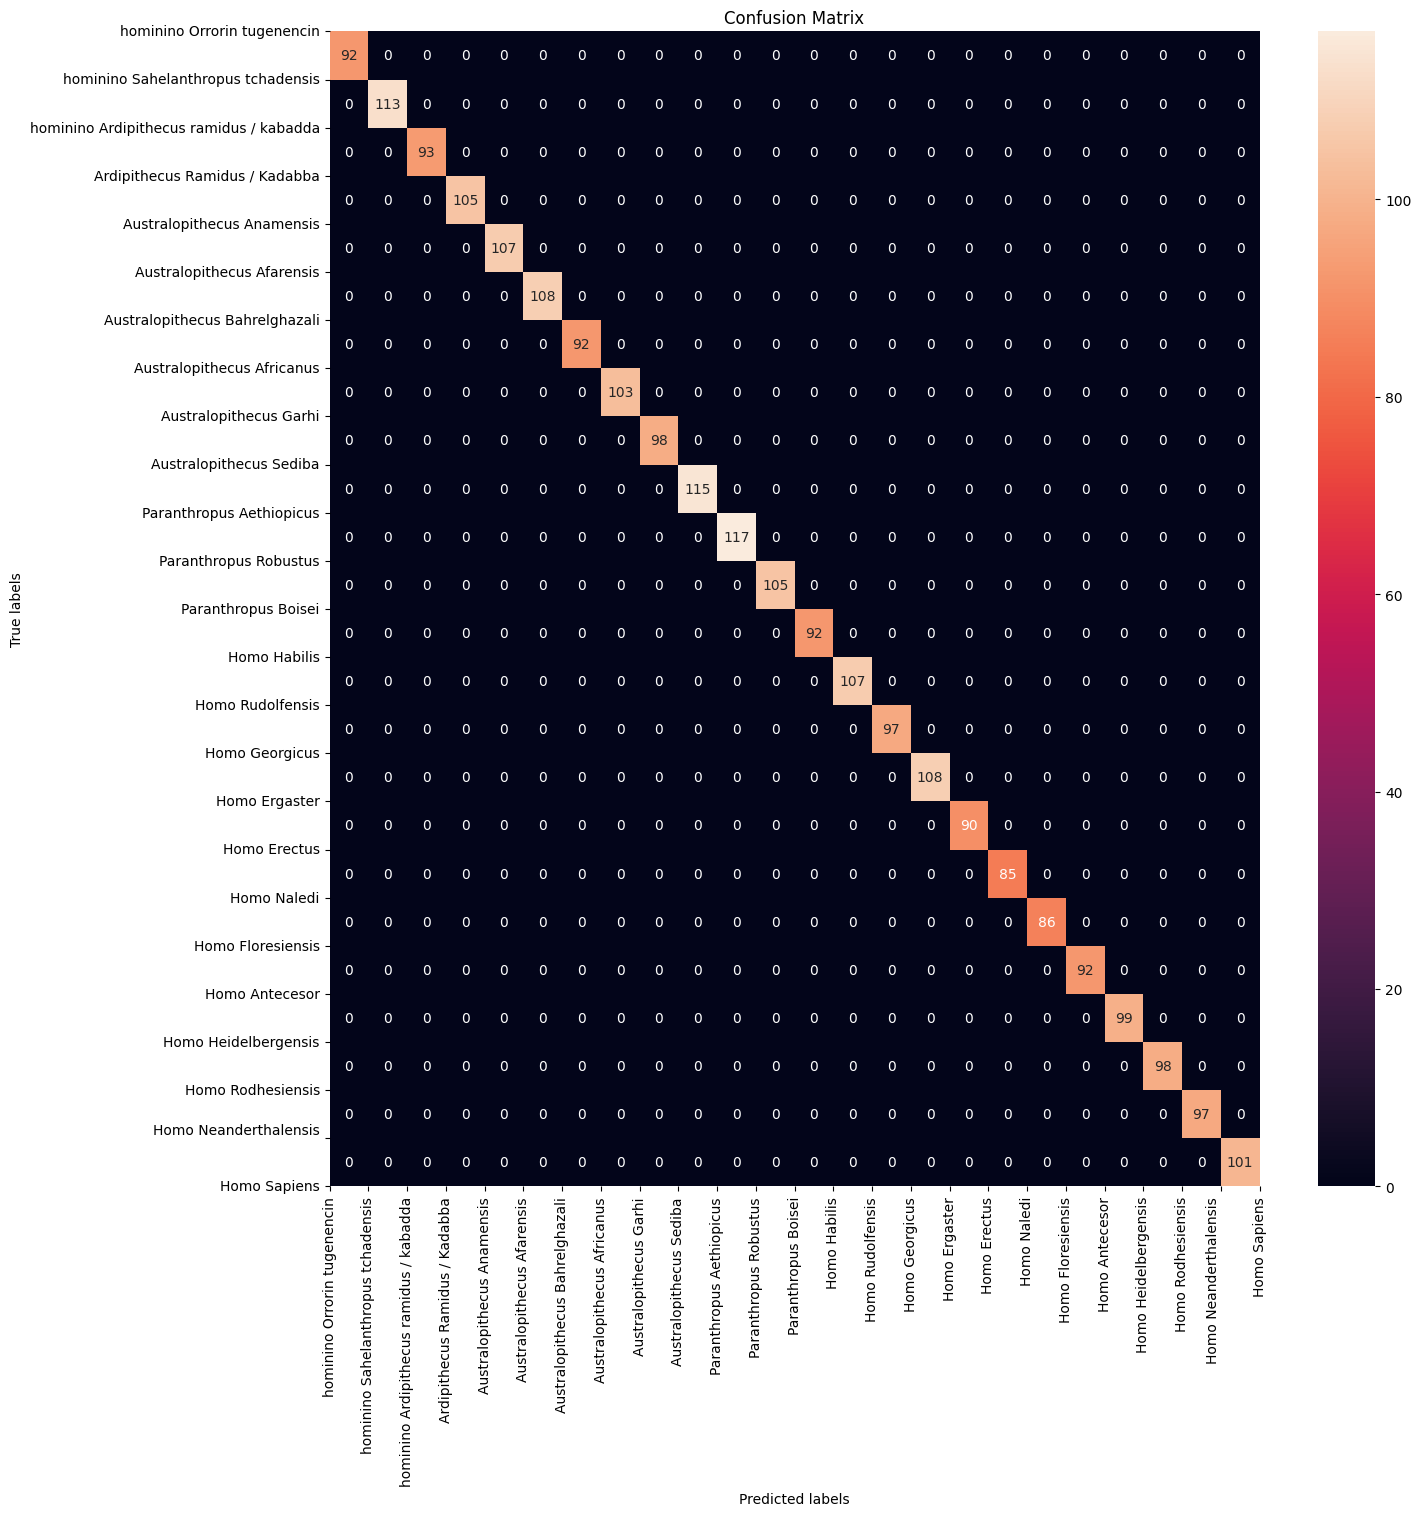

In [86]:
plt.figure(figsize=(15,15))
c_matrix1 = confusion_matrix(y1,y_pred_rf_pca_test1_2)
sns.heatmap(c_matrix1, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.title('Confusion Matrix')
plt.show();

In [87]:
X.columns

Index(['Time', 'Location_encoded', 'Zone_encoded', 'Habitat_encoded',
       'Cranial_Capacity', 'Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'arms_encoded', 'Diet_encoded', 'Sexual_Dimorphism_encoded',
       'Hip_encoded', 'Vertical_Front_encoded', 'Anatomy_encoded',
       'Migrated_encoded'],
      dtype='object')

In [21]:
X.columns

Index(['Time', 'Location_encoded', 'Zone_encoded', 'Habitat_encoded',
       'Cranial_Capacity', 'Height', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'arms_encoded', 'Diet_encoded', 'Sexual_Dimorphism_encoded',
       'Hip_encoded', 'Vertical_Front_encoded', 'Anatomy_encoded',
       'Migrated_encoded'],
      dtype='object')

In [41]:
columnas_traducidas = {
    'Time': 'Tiempo',
    'Location_encoded': 'Ubicación codificada',
    'Zone_encoded': 'Zona codificada',
    'Habitat_encoded': 'Hábitat codificado',
    'Cranial_Capacity': 'Capacidad Craneal',
    'Height': 'Altura',
    'Incisor_Size_encoded': 'Tamaño del Incisivo codificado',
    'Jaw_Shape_encoded': 'Forma de la Mandíbula codificada',
    'Torus_Supraorbital_encoded': 'Toro Supraorbitario codificado',
    'Prognathism_encoded': 'Prognatismo codificado',
    'Foramen_encoded': 'Foramen codificado',
    'Canine_Size_encoded': 'Tamaño del Canino codificado',
    'Canines_Shape_encoded': 'Forma de los Caninos codificada',
    'Tooth_Enamel_encoded': 'Esmalte Dental codificado',
    'Tecno_encoded': 'Tecno codificado',
    'tecno_type_mapping_encoded': 'Mapeo del Tipo Tecno codificado',
    'Biped_encoded': 'Bípedo codificado',
    'foots_encoded': 'Pies codificados',
    'arms_encoded': 'Brazos codificados',
    'Diet_encoded': 'Dieta codificada',
    'Sexual_Dimorphism_encoded': 'Dimorfismo Sexual codificado',
    'Hip_encoded': 'Cadera codificada',
    'Vertical_Front_encoded': 'Vertical Frontal codificada',
    'Anatomy_encoded': 'Anatomía codificada',
    'Migrated_encoded': 'Migrado codificado'
}


In [31]:
feature_importance = be1.named_steps['classifier'].feature_importances_

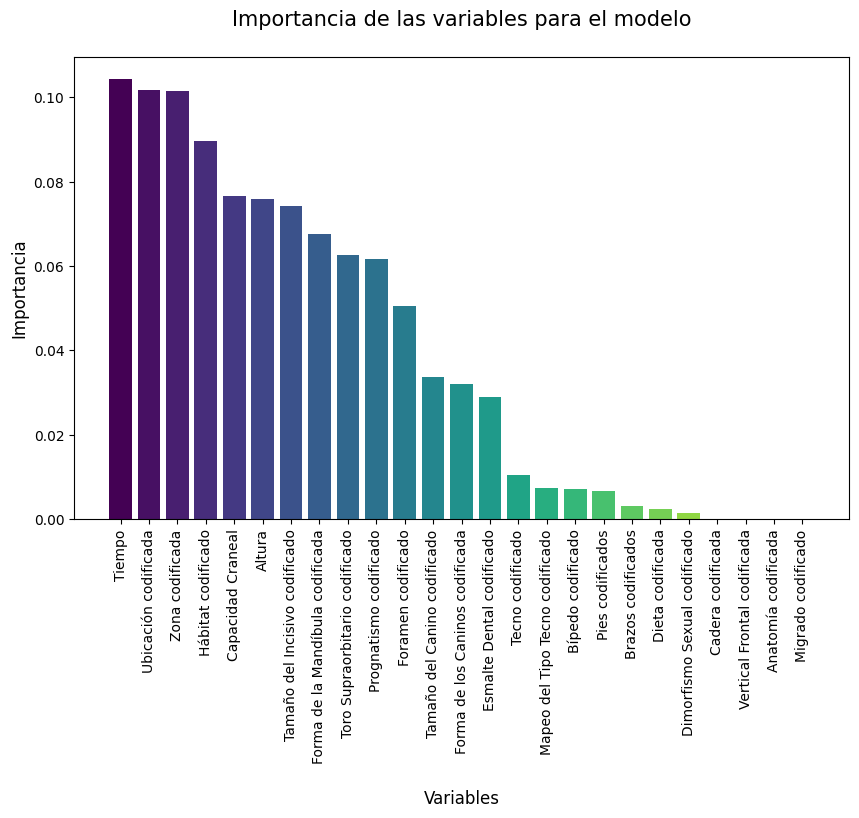

In [44]:
indices_ordenados = np.argsort(feature_importance)[::-1]

feature_importance_ordenada = feature_importance[indices_ordenados]
nombres_caracteristicas_ordenadas_traducidas = [columnas_traducidas.get(nombre, nombre) for nombre in columnas_traducidas]
#nombres_caracteristicas_ordenadas = X.columns[indices_ordenados]

colors = plt.cm.viridis(np.linspace(0, 1, len(nombres_caracteristicas_ordenadas_traducidas)))

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance_ordenada)), feature_importance_ordenada, tick_label=nombres_caracteristicas_ordenadas_traducidas, color=colors)
plt.xlabel('\nVariables',fontsize=12)
plt.ylabel('Importancia',fontsize=12)
plt.title('Importancia de las variables para el modelo\n',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [26]:
feature_importance.shape

(25,)

In [88]:
pca_features = pipeline.named_steps['pca'].fit_transform(X)

In [89]:
print("Dimensiones de importances:", importances.shape)
print("Dimensiones de X.columns:", X.columns.shape)

Dimensiones de importances: (25,)
Dimensiones de X.columns: (25,)


In [91]:


# Crear el DataFrame df_combined
df_combined = pd.DataFrame(data=importances, columns=['Feature_Importance'], index=X.columns)
df_combined['PC'] = [f'PC{i+1}' for i in range(pca_features.shape[1])]

In [92]:
df_combined = pd.DataFrame(data=importances, columns=['Feature_Importance'], index=X.columns)
df_combined['PC'] = [f'PC{i+1}' for i in range(pca_features.shape[1])]

In [93]:
df_combined= df_combined.sort_values(by='Feature_Importance',ascending=False)

In [94]:
df_combined.to_csv('../data/processed/df_feature_importances.csv',index_label='Feature_Name')

In [39]:
import pickle

filename = '../models/rf2_final.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be1, archivo_salida)

In [41]:
with open(filename, 'rb') as archivo_entrada:
    rf2_final = pickle.load(archivo_entrada)

## TERCER MODELO DE RANDOM FOREST PARA INTENTAR MEJORAR EL RECALL

In [189]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'classifier__n_estimators': [100,500,1000],
    'classifier__max_depth': [5,6,7],
    'classifier__max_leaf_nodes': [17,18,19]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=20,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 10, 'classifier__n_estimators': 500, 'classifier__max_leaf_nodes': 19, 'classifier__max_depth': 6}


In [190]:
be_rf_2=rs.best_estimator_.fit(X,y)

In [191]:
y_pred_rf_pca_test1_3=be_rf_2.predict(X1)
y_pred_rf_pca_test1_pproba_3 = be_rf_2.predict_proba(X1)

y_pred_rf_pca_train1_3=be_rf_2.predict(X)
y_pred_rf_pca_train1_pproba_3 = be_rf_2.predict_proba(X)

In [192]:
precision7 = precision_score(y1, y_pred_rf_pca_test1_3,average='weighted')
recall7 = recall_score(y1, y_pred_rf_pca_test1_3,average='weighted')
f17 = f1_score(y1, y_pred_rf_pca_test1_3,average='weighted')
accuracy7=accuracy_score(y1,y_pred_rf_pca_test1_3)

precision_train7 = precision_score(y, y_pred_rf_pca_train1_3,average='weighted')
recall_train7 = recall_score(y, y_pred_rf_pca_train1_3,average='weighted')
f1_train7 = f1_score(y, y_pred_rf_pca_train1_3,average='weighted')
accuracy_train7=accuracy_score(y,y_pred_rf_pca_train1_3)
roc_auc_train7= roc_auc_score(y,y_pred_rf_pca_train1_pproba_3,average='weighted',multi_class='ovo')

roc_auc7= roc_auc_score(y1,y_pred_rf_pca_test1_pproba_3,average='weighted',multi_class='ovo')
print('TEST')
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f17)
print('ROC AUC score:', roc_auc7)
print('Accuracy',accuracy7)
print('-'*200)
print('TRAIN')
print("Precision:", precision_train7)
print("Recall:", recall_train7)
print("F1-score:", f1_train7)
print('ROC AUC score:', roc_auc_train7)
print('Accuracy',accuracy_train7)

TEST
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0


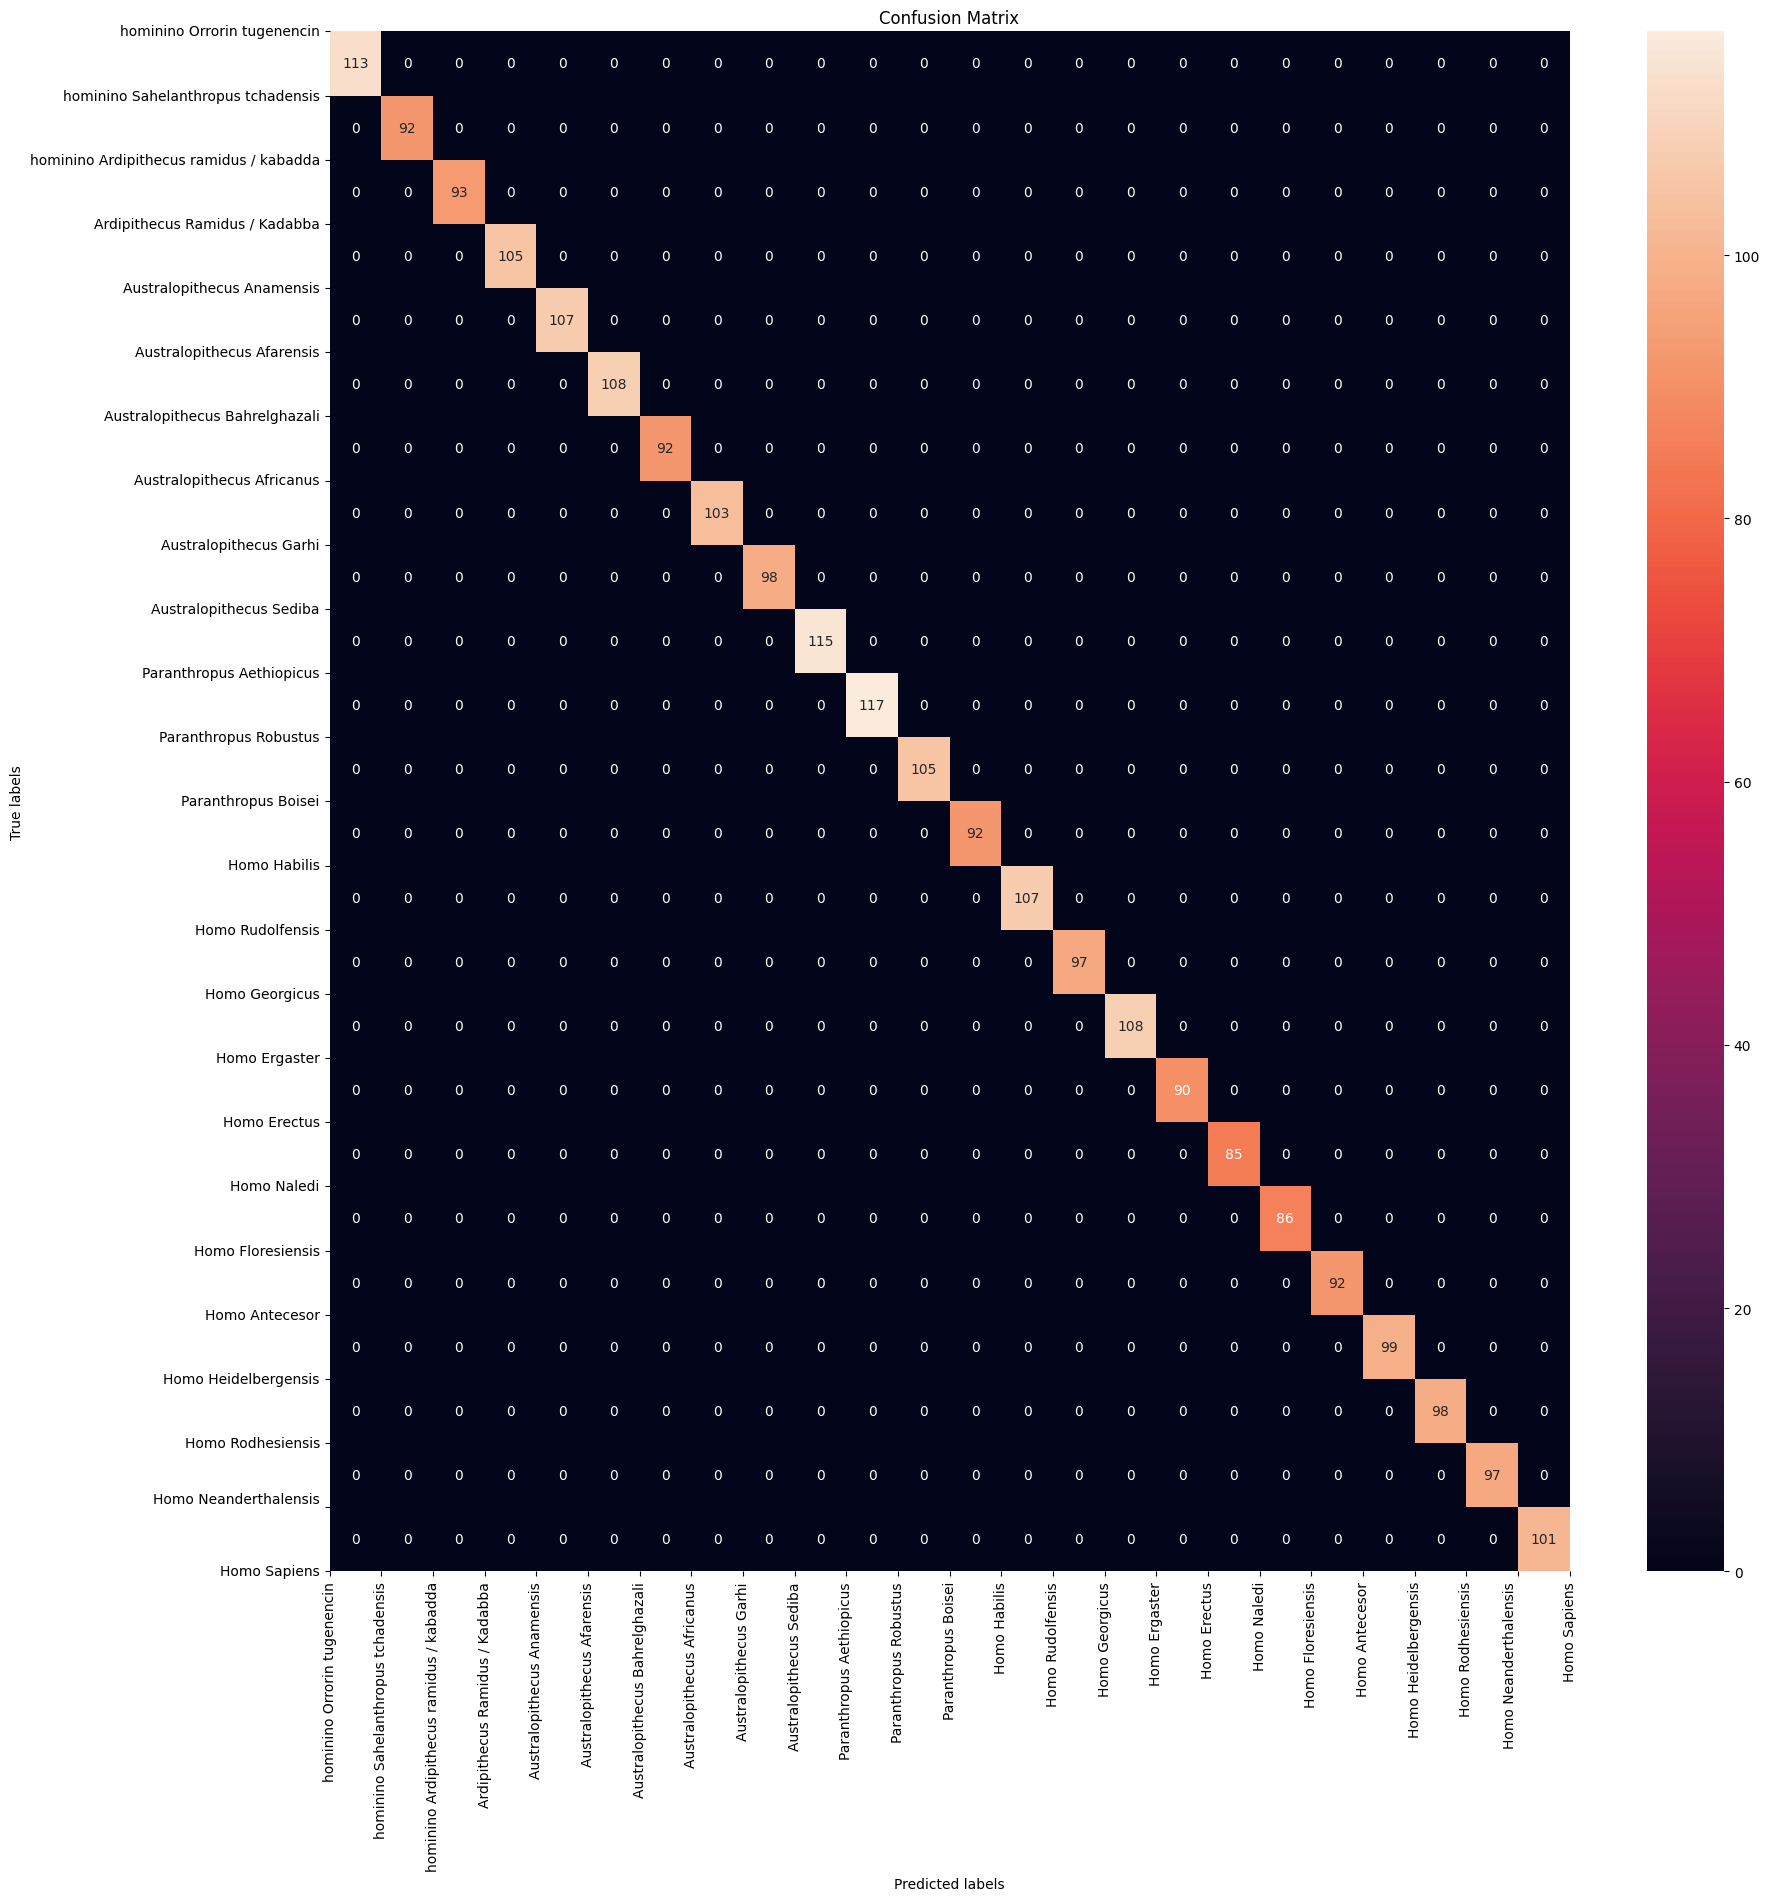

In [193]:
plt.figure(figsize=(20,20))
c_matrix_rf_2 = confusion_matrix(y1,y_pred_rf_pca_test1_3)
sns.heatmap(c_matrix_rf_2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## PRIMER MODELO DE LINEAR REGRESSION CON SCALER Y PCA

In [14]:


steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('reg', LogisticRegression())  
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'reg__penalty': ['l1', 'l2'],
    'reg__C': np.logspace(-4,4,100),  
    'reg__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'reg__max_iter': [100,200],
    'reg__class_weight': [None, 'balanced'],
    'reg__multi_class': ['ovr', 'multinomial']
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

rs = random_search.fit(X, y) 

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\teres\AppData

Best Score: 1.0
Best Parameters: {'scaler': StandardScaler(), 'reg__solver': 'lbfgs', 'reg__penalty': 'l2', 'reg__multi_class': 'ovr', 'reg__max_iter': 200, 'reg__class_weight': 'balanced', 'reg__C': 3274.5491628777318, 'pca__n_components': 25}


In [50]:
be_reglog1=rs.best_estimator_.fit(X,y)
y_pred_rl_pca_test1_1=be_reglog1.predict(X1)
y_pred_rl_pca_test1_pproba_1 = be_reglog1.predict_proba(X1)

In [51]:
precision3 = precision_score(y1, y_pred_rl_pca_test1_1,average='weighted')
recall3 = recall_score(y1, y_pred_rl_pca_test1_1,average='weighted')
f13 = f1_score(y1, y_pred_rl_pca_test1_1,average='weighted')
accuracy3=accuracy_score(y1,y_pred_rl_pca_test1_1)

roc_auc3= roc_auc_score(y1,y_pred_rl_pca_test1_pproba_1,average='weighted',multi_class='ovo')
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)
print('ROC AUC score:', roc_auc3)
print('Accuracy',accuracy3)
print('-'*200)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC score: 1.0
Accuracy 1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


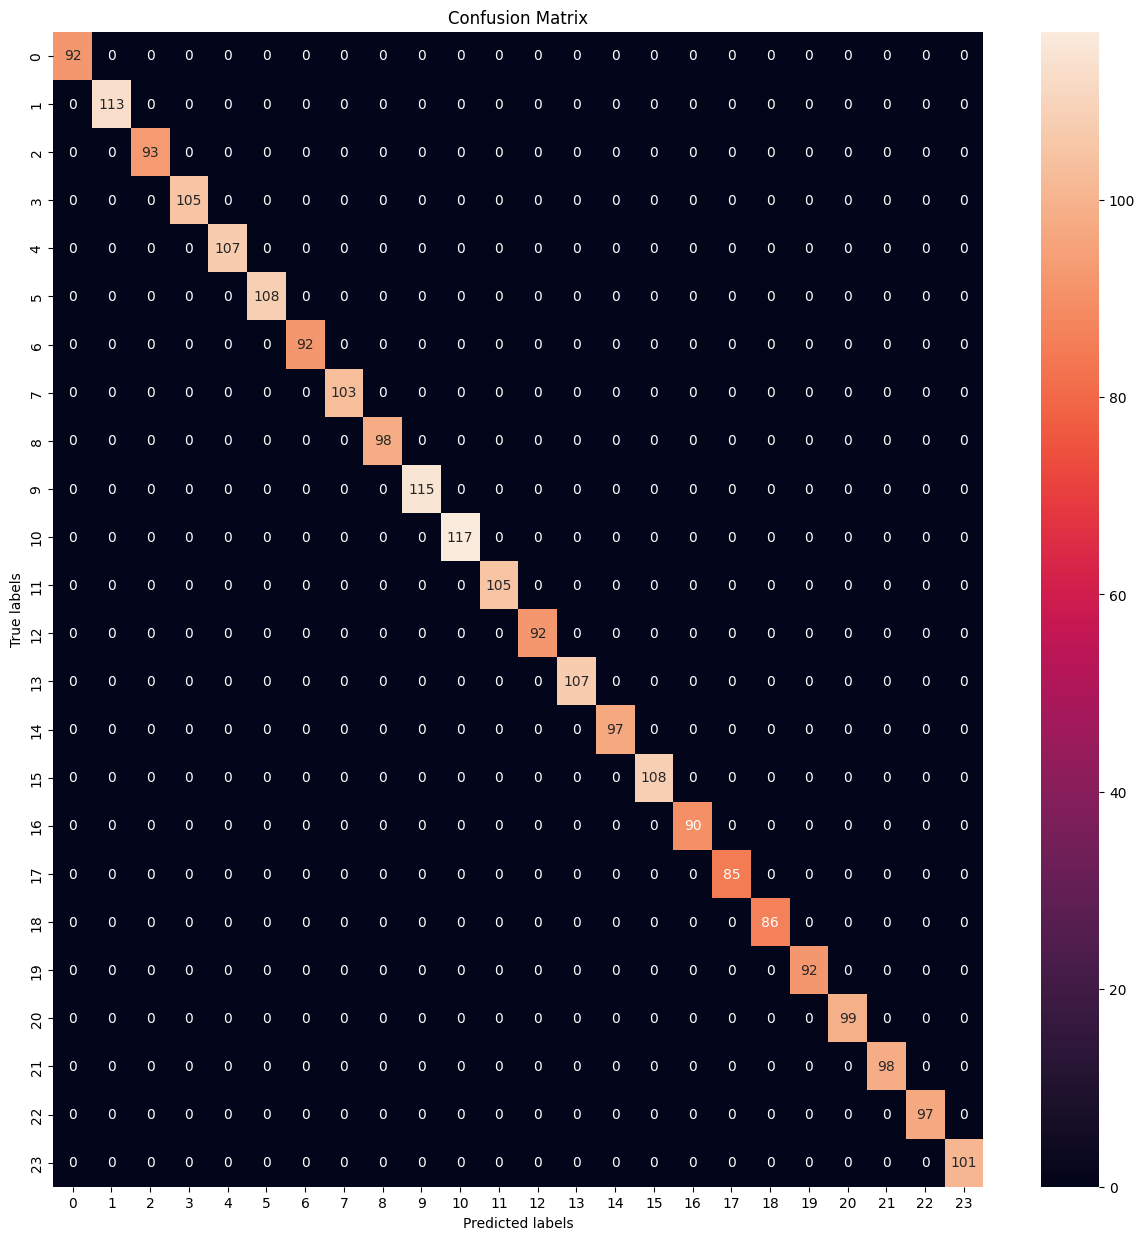

In [52]:
plt.figure(figsize=(15,15))
c_matrix2 = confusion_matrix(y1,y_pred_rl_pca_test1_1)
sns.heatmap(c_matrix2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [56]:
import pickle

filename = '../models/rl1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_reglog1, archivo_salida)

### MODELO DE KNN

In [15]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'knn__n_neighbors': [ 10, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30, 40, 50],
    'knn__p': [1, 2]  
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 24, 'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 20, 'knn__leaf_size': 30, 'knn__algorithm': 'ball_tree'}


In [16]:
be_knn1=rs.best_estimator_.fit(X,y)
y_pred_knn_pca_test1_1=be_knn1.predict(X1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy 1.0


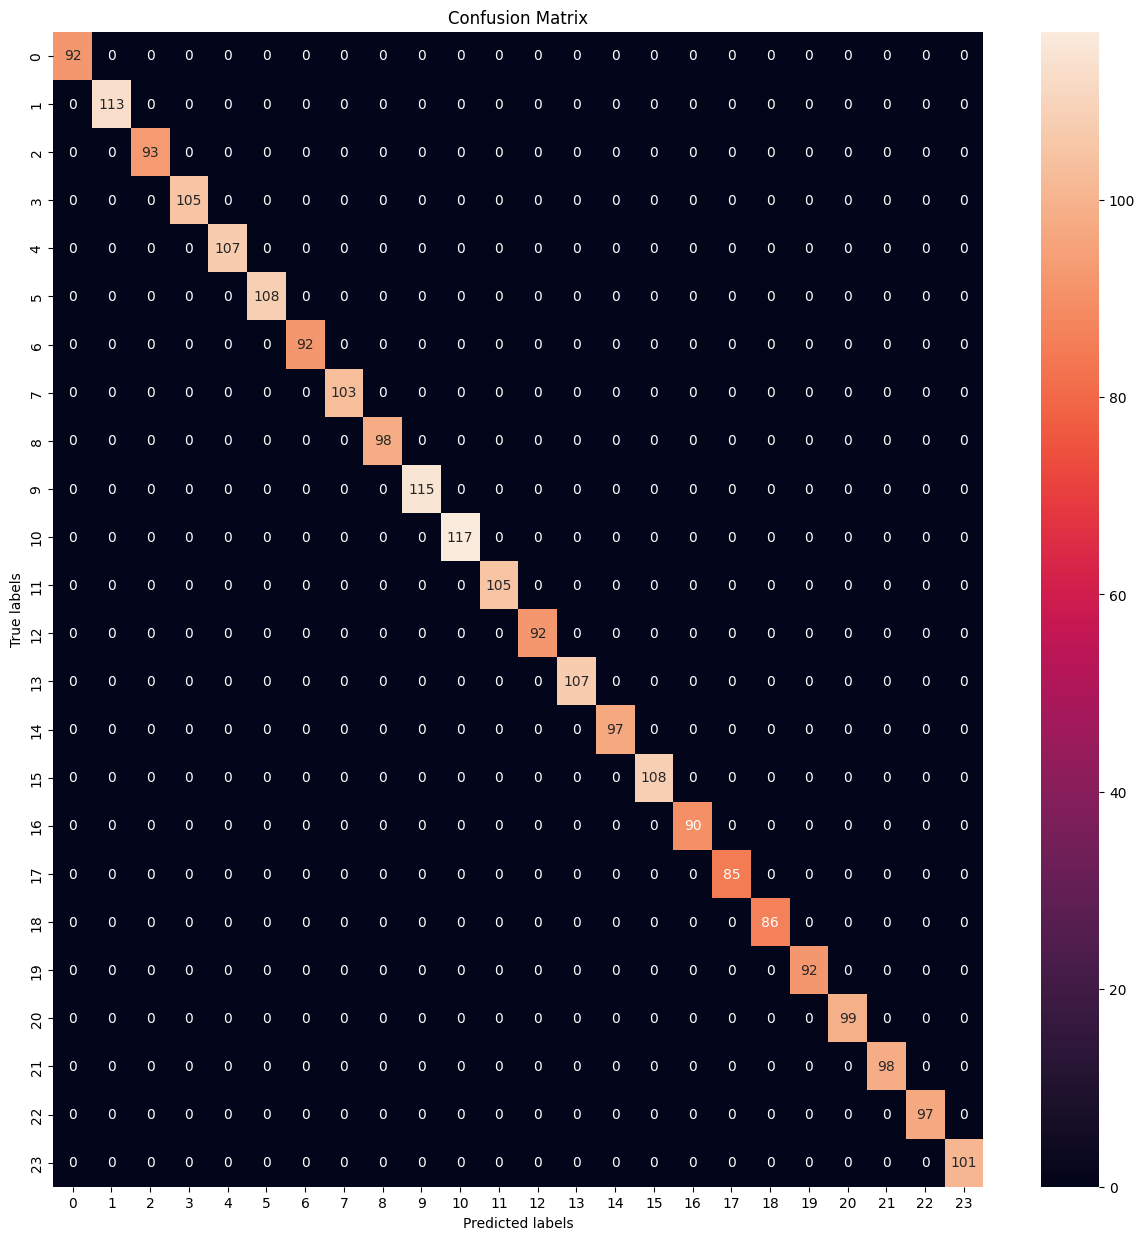

In [17]:
precision4 = precision_score(y1, y_pred_knn_pca_test1_1,average='weighted')
recall4 = recall_score(y1, y_pred_knn_pca_test1_1,average='weighted')
f14 = f1_score(y1, y_pred_knn_pca_test1_1,average='weighted')
accuracy4=accuracy_score(y1,y_pred_knn_pca_test1_1)

conf_matrix_knn = confusion_matrix(y1, y_pred_knn_pca_test1_1)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f14)
print('Accuracy',accuracy4)

plt.figure(figsize=(15,15))
c_matrix3 = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_knn, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [19]:
import pickle

filename = '../models/knn1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_knn1, archivo_salida)

## MODELO CON SUPPORT VECTOR MACHINE

In [20]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
]


pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': np.logspace(-3, 3, 7),
    'svm__gamma': ['scale', 'auto']
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 1000.0, 'scaler': StandardScaler(), 'pca__n_components': 24}


In [25]:
be_svm1=rs.best_estimator_.fit(X,y)
y_pred_svm_pca_test1_1=be_svm1.predict(X1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy 1.0


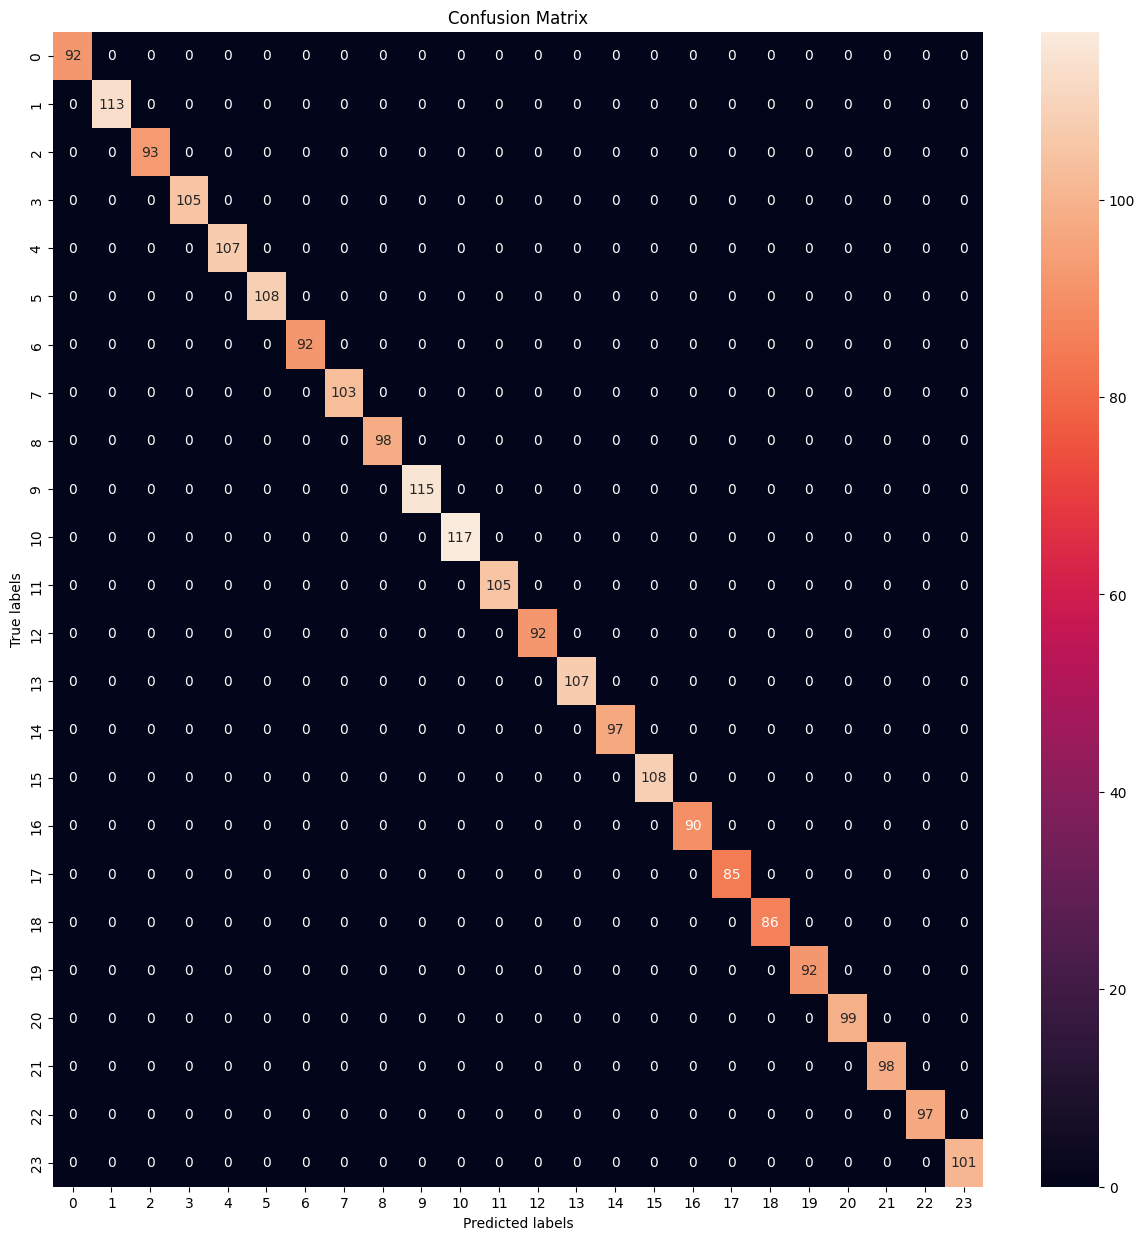

In [26]:
precision5 = precision_score(y1, y_pred_svm_pca_test1_1,average='weighted')
recall5 = recall_score(y1, y_pred_svm_pca_test1_1,average='weighted')
f15 = f1_score(y1, y_pred_svm_pca_test1_1,average='weighted')
accuracy5=accuracy_score(y1,y_pred_svm_pca_test1_1)

conf_matrix_svm = confusion_matrix(y1, y_pred_svm_pca_test1_1)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f15)
print('Accuracy',accuracy5)

plt.figure(figsize=(15,15))
c_matrix_svm = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_svm, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [27]:
import pickle

filename = '../models/svm1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_svm1, archivo_salida)

## MODELO CON GRADIENT BOOSTING CLASSIFIER

In [24]:

steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gb', GradientBoostingClassifier())
]


pipeline = Pipeline(steps)


param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [23,24,25],
    'gb__n_estimators': [100, 500, 1000],
    'gb__learning_rate': np.logspace(-3, 0, 10),
    'gb__max_depth': [3, 5, 7, 9],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__subsample': [0.5, 0.7, 0.9, 1]
}


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


rs = random_search.fit(X, y)  


best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 1.0
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 23, 'gb__subsample': 0.5, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 2, 'gb__max_depth': 7, 'gb__learning_rate': 0.046415888336127774}


In [206]:
be_gbc1=rs.best_estimator_.fit(X,y)
y_pred_gbc_pca_test1_1=be_gbc1.predict(X1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


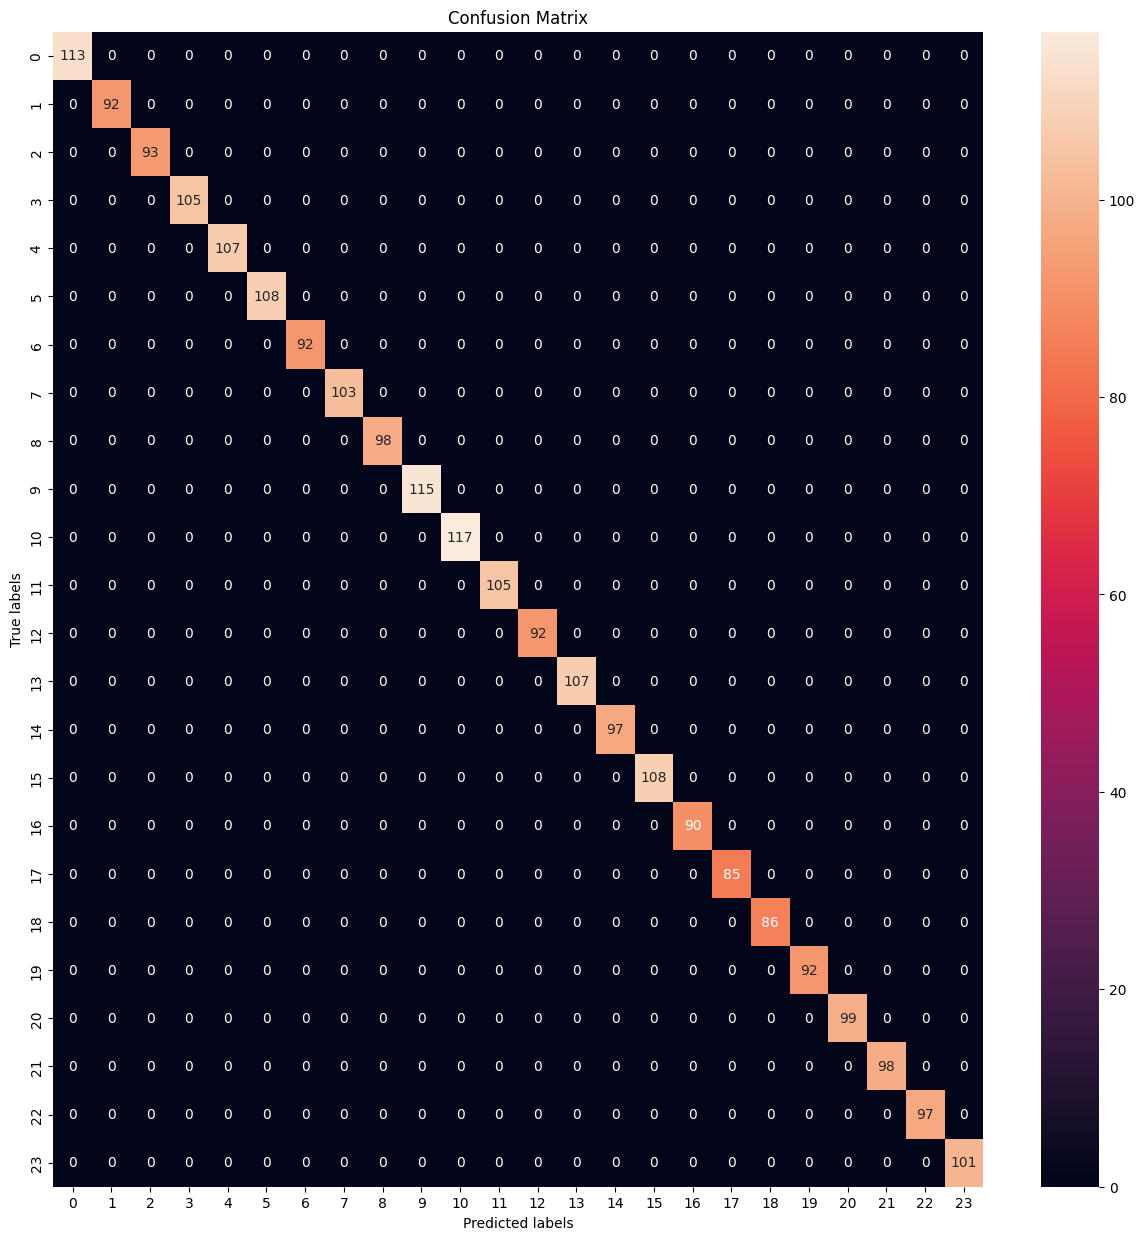

In [207]:
precision6 = precision_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
recall6 = recall_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
f16 = f1_score(y1, y_pred_gbc_pca_test1_1,average='weighted')

conf_matrix_gbc = confusion_matrix(y1, y_pred_gbc_pca_test1_1)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f16)

plt.figure(figsize=(15,15))
c_matrix_gbc = confusion_matrix(y1,y_pred_gbc_pca_test1_1)
sns.heatmap(conf_matrix_gbc, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [68]:
import pickle

filename = './models/gbc1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_gbc1, archivo_salida)

In [28]:
scaler=StandardScaler()
df_escalados=pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
pca_pipe = make_pipeline( PCA(n_components=25))
pca_pipe.fit(df_escalados)

modelo_pca = pca_pipe['pca']
modelo_pca


PCA(n_components=25)

In [29]:
modelo_pca.components_

array([[-1.98121998e-01,  1.66756632e-01,  4.65422761e-02,
         1.13743830e-01,  2.26364320e-01,  2.24493032e-01,
        -9.41176536e-02, -6.50212404e-02,  2.10291941e-01,
         2.42890329e-01,  2.16181557e-01,  1.33053201e-01,
         1.97679101e-01,  2.12695314e-01,  2.41240709e-01,
         2.43967734e-01,  2.13394359e-01,  1.98779164e-01,
         2.27747911e-01, -2.33698181e-01,  2.33035878e-01,
         2.00722900e-01,  2.37223783e-01,  2.43769538e-01,
         1.77747496e-01],
       [ 3.27272548e-01, -1.33237546e-01,  1.97922247e-02,
         3.18123344e-01, -1.00529888e-01, -5.77716556e-02,
        -5.19145414e-01,  4.68104663e-01,  8.97289474e-02,
         1.71786380e-01, -1.36858114e-01,  2.86255049e-01,
        -6.03887479e-03, -1.74419475e-02,  7.63384043e-03,
        -1.26305694e-02, -2.51254033e-01, -2.14435411e-02,
         9.86152695e-03,  9.09586515e-02,  8.37004624e-02,
         2.68012601e-02,  6.83887815e-02,  4.18467038e-03,
         2.19768728e-01],
    

In [30]:
modelo_pca.explained_variance_ratio_

array([5.68220861e-01, 9.61786161e-02, 7.41149667e-02, 6.08186134e-02,
       4.57527228e-02, 3.43543789e-02, 2.54435112e-02, 2.18809408e-02,
       1.54819782e-02, 1.51118747e-02, 1.16154360e-02, 7.25497183e-03,
       6.07482201e-03, 3.98696447e-03, 3.48839590e-03, 3.21185466e-03,
       2.48833719e-03, 1.35552702e-03, 1.08340282e-03, 8.97203871e-04,
       6.12096380e-04, 3.55003468e-04, 1.39072736e-04, 7.03796895e-05,
       8.06840283e-06])

In [31]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.56822086, 0.66439948, 0.73851444, 0.79933306, 0.84508578,
       0.87944016, 0.90488367, 0.92676461, 0.94224659, 0.95735846,
       0.9689739 , 0.97622887, 0.98230369, 0.98629066, 0.98977905,
       0.99299091, 0.99547925, 0.99683477, 0.99791818, 0.99881538,
       0.99942748, 0.99978248, 0.99992155, 0.99999193, 1.        ])

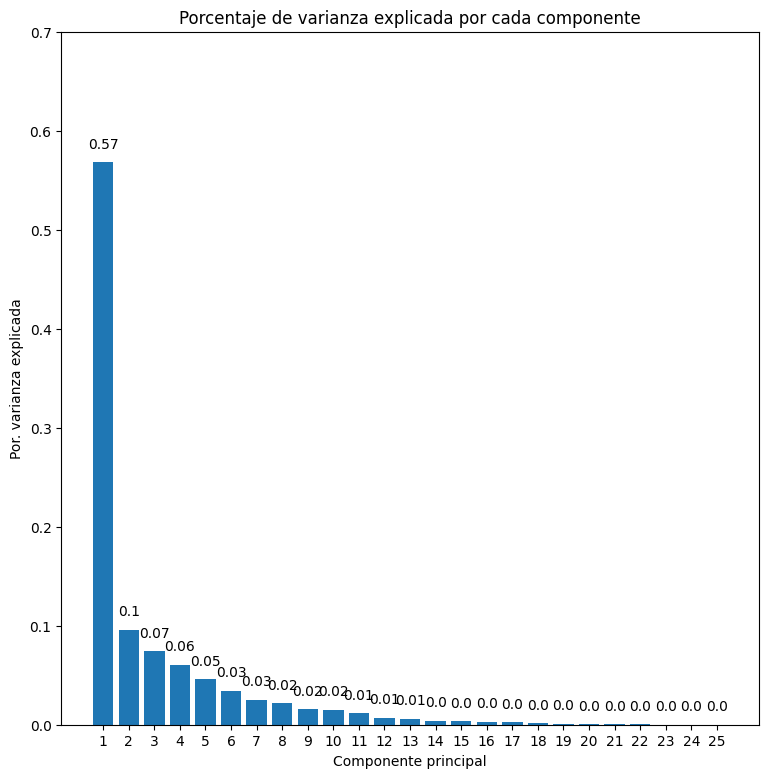

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.7)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

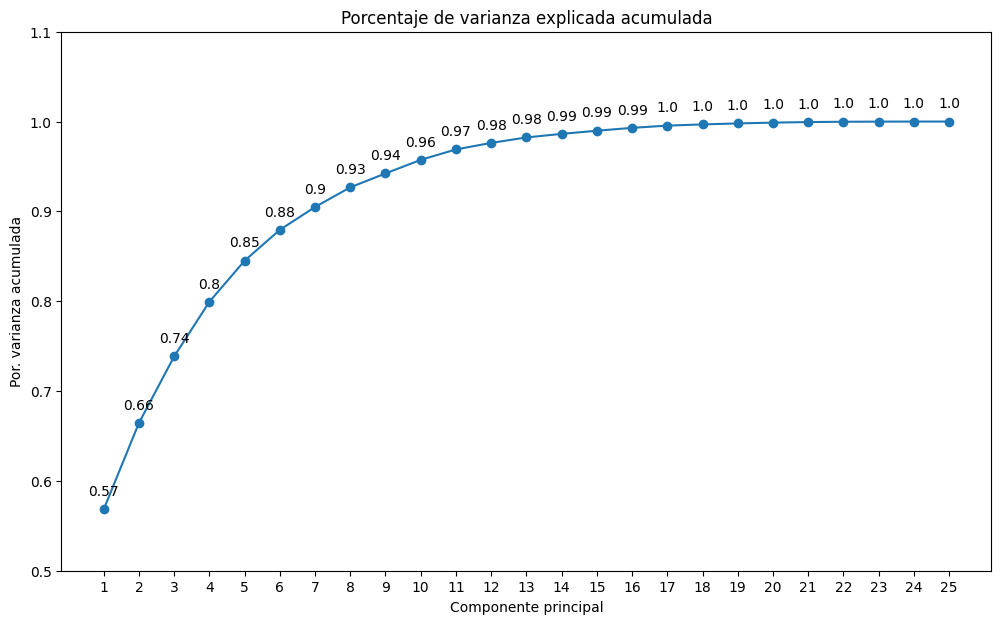

In [50]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))
ax.plot(
    np.arange(len(X1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [37]:
pca_features1 = modelo_pca.feature_names_in_

In [34]:
variance_explained = modelo_pca.explained_variance_ratio_


df_variance_explained = pd.DataFrame({'Component': [f'PC{i+1}' for i in range(len(variance_explained))],
                                     'Explained Variance Ratio': variance_explained})

In [35]:
print(df_variance_explained)

   Component  Explained Variance Ratio
0        PC1                  0.568221
1        PC2                  0.096179
2        PC3                  0.074115
3        PC4                  0.060819
4        PC5                  0.045753
5        PC6                  0.034354
6        PC7                  0.025444
7        PC8                  0.021881
8        PC9                  0.015482
9       PC10                  0.015112
10      PC11                  0.011615
11      PC12                  0.007255
12      PC13                  0.006075
13      PC14                  0.003987
14      PC15                  0.003488
15      PC16                  0.003212
16      PC17                  0.002488
17      PC18                  0.001356
18      PC19                  0.001083
19      PC20                  0.000897
20      PC21                  0.000612
21      PC22                  0.000355
22      PC23                  0.000139
23      PC24                  0.000070
24      PC25             

In [43]:
df_pca_importance = pd.DataFrame({'Feature': pca_features1,
                                  'Component': [f'PC{i+1}' for i in range(len(variance_explained))],
                                  'Explained Variance Ratio': variance_explained})


df_pca_importance.sort_values(by='Explained Variance Ratio',ascending=False)

,Feature,Component,Explained Variance Ratio
0,Time,PC1,0.568221
1,Location_encoded,PC2,0.096179
2,Zone_encoded,PC3,0.074115
3,Habitat_encoded,PC4,0.060819
4,Cranial_Capacity,PC5,0.045753
5,Height,PC6,0.034354
6,Incisor_Size_encoded,PC7,0.025444
7,Jaw_Shape_encoded,PC8,0.021881
8,Torus_Supraorbital_encoded,PC9,0.015482
9,Prognathism_encoded,PC10,0.015112
